#### Ball by ball data of the matches played during the 10 seasons of IPL.
    Dataset consists following columns:

        -  mid: Unique match id

        - date: Date on which the match was played

        - venue: Stadium where match was played

        - battingteam: Batting team name

        - bowlingteam: Bowling team name

        - batsman: Batsman who faced that particular ball

        - bowler: Bowler who bowled that particular ball

        - runs: Runs scored by team till that point of instance

        - wickets: Number of Wickets fallen of the team till that point of instance

        - overs: Number of Overs bowled till that point of instance

        - runslast5: Runs scored in previous 5 overs

        - wicketslast5: Number of Wickets that fell in previous 5 overs

        - striker: max(runs scored by striker, runs scored by non-striker)

        - non-striker: min(runs scored by striker, runs scored by non-striker)

        - total: Total runs scored by batting team at the end of first innings

In [1]:
import os,numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Machine learning\Projects')

In [3]:
os.listdir()

['data.csv']

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
data.shape

(76014, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [8]:
data.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [9]:
columns=['mid','date','batsman','bowler','striker','non-striker']
print(f'Before Removing Irrelevant Columns : {data.shape}')
data = data.drop(columns, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {data.shape}')

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 9)


In [10]:
cat_feat = data.select_dtypes(include='O')
cat_feat.columns

Index(['venue', 'batting_team', 'bowling_team'], dtype='object')

In [11]:
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'], dtype='object')

In [12]:
# Unique values in data
for i in cat_feat.columns:
    print(f'{i} \n Number of unique values are: {data[i].nunique()} \n Unique values are: {data[i].unique()}\n ')

venue 
 Number of unique values are: 35 
 Unique values are: ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Associ

In [13]:
data.nunique()

venue              35
batting_team       14
bowling_team       14
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
total             138
dtype: int64

In [14]:
teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad', 'Gujarat Lions']

In [15]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['batting_team'].isin(teams)) & (data['bowling_team'].isin(teams))]
print(f'After Removing Irrelevant records : {data.shape}')
print(f"Consistent Teams : \n{data['batting_team'].unique()}")


Before Removing Inconsistent Teams : (76014, 9)
After Removing Irrelevant records : (57017, 9)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad' 'Gujarat Lions']


In [16]:
data.head()

,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [17]:
data.runs_last_5.unique()

array([  1,   2,   3,   7,  11,  17,  21,  22,  26,  27,  32,  38,  39,
        43,  44,  50,  54,  55,  59,  58,  52,  47,  45,  46,  41,  35,
        34,  30,  31,  24,  37,  40,  51,  61,  60,  62,  57,  56,  49,
        64,  67,  66,  71,  69,  68,   0,   5,   9,  13,  19,  20,  25,
        28,  29,  33,  42,  48,  53,  65,  63,  70,  72,  74,  79,  81,
        83,   8,  18,  36,  23,   4,   6,  10,  16,  12,  14,  15,  76,
        75,  73,  78,  88,  87,  93,  94,  86,  89,  92,  91,  85,  80,
        77,  82,  84,  95, 100, 104, 109, 110, 111, 113, 112], dtype=int64)

In [18]:
##Remove First 5 Overs of every match
print(f'Before Removing Overs : {data.shape}')
data = data[data['overs'] >= 5.0]
print(f'After Removing Overs : {data.shape}')

Before Removing Overs : (57017, 9)
After Removing Overs : (42512, 9)


In [19]:
data.head()

,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


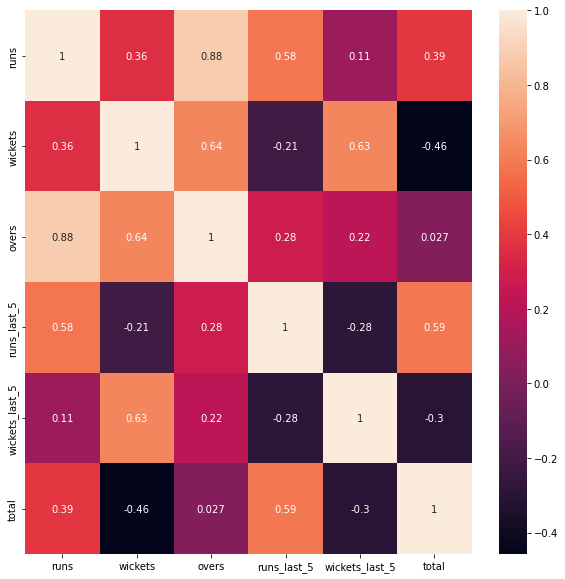

In [20]:
from seaborn import heatmap
plt.figure(figsize=(10, 10))
heatmap(data=data.corr(),annot=True);

In [21]:
cat_feat.columns

Index(['venue', 'batting_team', 'bowling_team'], dtype='object')

In [22]:
encode_data = data.copy()

In [23]:
##performing Label Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
columns = ['venue']
for col in columns:
    encode_data[col]=le.fit_transform(encode_data[col])

In [24]:
data.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [25]:
encode_data.venue.unique()

array([14, 21,  8, 32, 25, 15,  7,  4, 18, 29, 13, 31,  2, 17,  3, 19,  1,
       23, 10, 30, 22, 26, 12, 28, 27,  6,  0, 16,  5, 20, 24,  9, 11])

In [26]:
encode_data.head()

,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,14,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,14,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,14,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,14,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,14,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [27]:
encoded_data = pd.get_dummies(encode_data, columns=['batting_team', 'bowling_team'], drop_first=True)
encoded_data.head()

,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Daredevils,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
32,14,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,14,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,14,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,14,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,14,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
final_data = encoded_data.copy()

In [29]:
##Model Building
##Prepare Train and Test Splits
X = final_data.drop(['total'], axis=1)
y = final_data['total']

In [30]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(f"Training Set : {X_train.shape}")

Training Set : (34009, 22)


In [32]:
print(f"Testing Set : {y_train.shape}")

Testing Set : (34009,)


In [33]:
# Keeping track of model perfomances
models = dict()

In [34]:
##Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [35]:
# Train Model
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
# Predictions
y_pred = tree.predict(X_test)

In [37]:
# Evaluate Model
train_score_tree = str(tree.score(X_train,y_train) * 100)
test_score_tree = str(tree.score(X_test, y_test) * 100)

In [38]:
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')

Train Score : 99.99%
Test Score : 89.98%


In [39]:
models["tree"] = test_score_tree

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 2.872103963307068
Mean Squared Error (MSE): 87.93252381512407
Root Mean Squared Error (RMSE): 9.377234337219267


In [42]:
##Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Train Model
lin_reg.fit(X_train,y_train)

LinearRegression()

In [43]:
# Predictions
y_pred_lin_reg = lin_reg.predict(X_test)

In [44]:
# Evaluate Model
train_score_lin_reg = str(lin_reg.score(X_train, y_train) * 100)
test_score_lin_reg = str(lin_reg.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_lin_reg[:5]}% \nTest Score : {test_score_lin_reg[:5]}%')
models["lin_reg"] = test_score_lin_reg

Train Score : 65.40% 
Test Score : 66.43%


In [45]:
test_score_lin_reg[:5]

'66.43'

In [46]:
test_score_lin_reg

'66.43274958837692'

In [47]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lin_reg)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lin_reg)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lin_reg))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.852144034317227
Mean Squared Error (MSE): 294.6182827782822
Root Mean Squared Error (RMSE): 17.164448222365966


In [48]:
##Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
# Train Model
forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
# Predictions
y_pred_forest_reg = forest_reg.predict(X_test)

In [50]:
# Evaluate Model
train_score_forest = str(forest_reg.score(X_train, y_train)*100)
test_score_forest = str(forest_reg.score(X_test, y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest_reg"] = test_score_forest

Train Score : 99.43%
Test Score : 95.89%


In [51]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_forest_reg)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_forest_reg)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_forest_reg))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 3.319385981418323
Mean Squared Error (MSE): 36.06991558817803
Root Mean Squared Error (RMSE): 6.005823472945074


In [52]:
##Lasso Regression
from sklearn.linear_model import LassoCV
lasso_reg = LassoCV()
# Train Model
lasso_reg.fit(X_train,y_train)

LassoCV()

In [53]:
# Predictions
y_pred_lasso_reg = lasso_reg.predict(X_test)

In [54]:
# Evaluate Model
train_score_lasso = str(lasso_reg.score(X_train,y_train)*100)
test_score_lasso = str(lasso_reg.score(X_test,y_test)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["lasso_reg"] = test_score_lasso

Train Score : 64.29%
Test Score : 65.32%


In [55]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lasso_reg)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lasso_reg)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lasso_reg))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.917451782689064
Mean Squared Error (MSE): 304.3748399374997
Root Mean Squared Error (RMSE): 17.446341735088755


In [56]:
##Support Vector Machine
from sklearn.svm import SVR
sv_reg = SVR()
# Train Model
sv_reg.fit(X_train,y_train)

SVR()

In [57]:
# Predictions
y_pred_sv_reg = sv_reg.predict(X_test)

In [58]:
train_score_svm = str(sv_reg.score(X_train,y_train)*100)
test_score_svm = str(sv_reg.score(X_test,y_test)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["sv_reg"] = test_score_svm 

Train Score : 57.26%
Test Score : 58.30%


In [59]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_sv_reg)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_sv_reg)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_sv_reg))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.418128568321315
Mean Squared Error (MSE): 365.97853843900714
Root Mean Squared Error (RMSE): 19.13056555460416


In [60]:
##Neural Networks
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)
# Train Model
neural_net.fit(X_train,y_train)

MLPRegressor(activation='logistic', max_iter=500)

In [61]:
train_score_neural_net = str(neural_net.score(X_train,y_train)*100)
test_score_neural_net = str(neural_net.score(X_test,y_test)*100)
print(f'Train Score : {train_score_neural_net[:5]}%\nTest Score : {test_score_neural_net[:5]}%')
models["neural_net"] = test_score_neural_net 

Train Score : 90.13%
Test Score : 89.31%


In [62]:
# Predictions
y_pred_neural = neural_net.predict(X_test)

In [63]:
print("---- Neural Networks Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_neural)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_neural)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_neural))))

---- Neural Networks Regression - Model Evaluation ----
Mean Absolute Error (MAE): 6.754460965426468
Mean Squared Error (MSE): 93.7429189585056
Root Mean Squared Error (RMSE): 9.682092695203119


<AxesSubplot:>

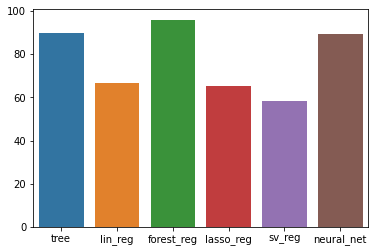

In [64]:
##Best Model Selection
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

In [65]:
pd.set_option('display.max_columns', None)
final_data.head()

,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Daredevils,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
32,14,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,14,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,14,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,14,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,14,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
venue_names = data.venue.unique()
encoded_venue_values = encoded_data.venue.unique()
venue_dic = dict(zip(venue_names, encoded_venue_values))
venue_dic

{'M Chinnaswamy Stadium': 14,
 'Punjab Cricket Association Stadium, Mohali': 21,
 'Feroz Shah Kotla': 8,
 'Wankhede Stadium': 32,
 'Sawai Mansingh Stadium': 25,
 'MA Chidambaram Stadium, Chepauk': 15,
 'Eden Gardens': 7,
 'Dr DY Patil Sports Academy': 4,
 'Newlands': 18,
 "St George's Park": 29,
 'Kingsmead': 13,
 'SuperSport Park': 31,
 'Buffalo Park': 2,
 'New Wanderers Stadium': 17,
 'De Beers Diamond Oval': 3,
 'OUTsurance Oval': 19,
 'Brabourne Stadium': 1,
 'Sardar Patel Stadium, Motera': 23,
 'Himachal Pradesh Cricket Association Stadium': 10,
 'Subrata Roy Sahara Stadium': 30,
 'Rajiv Gandhi International Stadium, Uppal': 22,
 'Shaheed Veer Narayan Singh International Stadium': 26,
 'JSCA International Stadium Complex': 12,
 'Sheikh Zayed Stadium': 28,
 'Sharjah Cricket Stadium': 27,
 'Dubai International Cricket Stadium': 6,
 'Barabati Stadium': 0,
 'Maharashtra Cricket Association Stadium': 16,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 5,
 'Punjab Cricket Associ

In [67]:
def predict_score(venue, runs, wickets, overs, runs_last_5, wickets_last_5, batting_team, bowling_team, model=forest_reg):
    prediction_array = []
    
    # Venue
    if venue == 'Barabati Stadium':
        prediction_array = prediction_array + [0]
    elif venue == 'Brabourne Stadium':
        prediction_array = prediction_array + [1]
    elif venue == 'Buffalo Park':
        prediction_array = prediction_array + [2]
    elif venue == 'De Beers Diamond Oval':
        prediction_array = prediction_array + [3]
    elif venue == 'Dr DY Patil Sports Academy':
        prediction_array = prediction_array + [4]
    elif venue == 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':
        prediction_array = prediction_array + [5]
    elif venue == 'Dubai International Cricket Stadium':
        prediction_array = prediction_array + [6]
    elif venue == 'Eden Gardens':
        prediction_array = prediction_array + [7]
    elif venue == 'Feroz Shah Kotla':
        prediction_array = prediction_array + [8]
    elif venue == 'Green Park':
        prediction_array = prediction_array + [9]
    elif venue == 'Himachal Pradesh Cricket Association Stadium':
        prediction_array = prediction_array + [10]
    elif venue == 'JSCA International Stadium Complex':
        prediction_array = prediction_array + [12]
    elif venue == 'Kingsmead':
        prediction_array = prediction_array + [13]
    elif venue == 'M Chinnaswamy Stadium':
        prediction_array = prediction_array + [14]
    elif venue == 'MA Chidambaram Stadium, Chepauk':
        prediction_array = prediction_array + [15]
    elif venue == 'Maharashtra Cricket Association Stadium':
        prediction_array = prediction_array + [16]
    elif venue == 'New Wanderers Stadium':
        prediction_array = prediction_array + [17]
    elif venue == 'Newlands':
        prediction_array = prediction_array + [18]
    elif venue == 'OUTsurance Oval':
        prediction_array = prediction_array + [19]
    elif venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali':
        prediction_array = prediction_array + [20]
    elif venue == 'Punjab Cricket Association Stadium, Mohali':
        prediction_array = prediction_array + [21]
    elif venue == 'Rajiv Gandhi International Stadium, Uppal':
        prediction_array = prediction_array + [22]
    elif venue == 'Sardar Patel Stadium, Motera':
        prediction_array = prediction_array + [23]
    elif venue == 'Saurashtra Cricket Association Stadium':
        prediction_array = prediction_array + [24]
    elif venue == 'Sawai Mansingh Stadium':
        prediction_array = prediction_array + [25]
    elif venue == 'Shaheed Veer Narayan Singh International Stadium':
        prediction_array = prediction_array + [26]
    elif venue == 'Sharjah Cricket Stadium':
        prediction_array = prediction_array + [27]
    elif venue == 'Sheikh Zayed Stadium':
        prediction_array = prediction_array + [28]
    elif venue == "St George's Park":
        prediction_array = prediction_array + [29]
    elif venue == 'Subrata Roy Sahara Stadium':
        prediction_array = prediction_array + [30]
    elif venue == 'SuperSport Park':
        prediction_array = prediction_array + [31]
    elif venue == 'Wankhede Stadium':
        prediction_array = prediction_array + [32]
    
    prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
    
    
      # Batting Team
    if batting_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
        
      # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
        
    prediction_array = np.array([prediction_array])
    pred = model.predict(prediction_array)
    return int(round(pred[0]))

In [68]:
X_test.tail(5)

,venue,runs,wickets,overs,runs_last_5,wickets_last_5,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Daredevils,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
56324,23,109,4,16.2,62,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
31670,7,43,2,8.2,25,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
63744,24,89,3,12.4,31,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14671,8,147,3,13.3,49,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9695,29,113,3,16.6,42,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
y_test[-5:]

56324    164
31670    134
63744    135
14671    218
9695     153
Name: total, dtype: int64

    Prediction 01
     - venue = 'Eden Gardens'
     - batting_team = 'Kings XI Punjab'
     - bowling_team = 'Kolkata Knight Riders'
     - Actual score = 134

In [70]:
venue = 'Eden Gardens'
batting_team = 'Kings XI Punjab'
bowling_team = 'Kolkata Knight Riders'
score = predict_score(venue, runs = 43, wickets = 2,overs = 8.2, runs_last_5 = 25,
                      wickets_last_5 = 1, batting_team = batting_team, bowling_team = bowling_team)
print(f'Predicted score: {score} | Actual score: {134}')

Predicted score: 133 | Actual score: 134


    Prediction 02
     - venue = 'Feroz Shah Kotla'
     - batting_team = 'Mumbai Indians'
     - bowling_team = 'Delhi Daredevils'
     - Actual score = 218

In [71]:
venue = 'Feroz Shah Kotla'
batting_team = 'Mumbai Indians'
bowling_team = 'Delhi Daredevils'
score = predict_score(venue, runs = 147, wickets = 3,overs = 13.3, runs_last_5 = 49,
                      wickets_last_5 = 1, batting_team = batting_team, bowling_team = bowling_team)
print(f'Predicted score: {score} | Actual score: {218}')

Predicted score: 212 | Actual score: 218
